## Data investigation

Data import

Import libs

In [66]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
## Import the sample data
## clock the time for import

df = pd.read_csv("..//data//20180920_Kaufland_case_IoT_and_predictive_maintenance.csv",
                 sep = ';', encoding='utf-8')

schema = {
    "date_measurement": 'datetime64[ns]',
    "start_timestamp": 'datetime64[ns]',
    "end_timestamp": 'datetime64[ns]',
}

df = df.astype(schema)

Time imprt had taken 8.00 seconds


# group by machine, sensor and day and create a column for the max measurement for the particular hour.

In [3]:
## Describe data
df.shape

(3860434, 7)

In [4]:
## Look at the column names
df.columns

Index(['ifm_analysis_sensordata_for_datathon_final.machine_name',
       'ifm_analysis_sensordata_for_datathon_final.sensor_type',
       'ifm_analysis_sensordata_for_datathon_final.date_measurement',
       'ifm_analysis_sensordata_for_datathon_final.start_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.end_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.realvalue',
       'ifm_analysis_sensordata_for_datathon_final.unit'],
      dtype='object')

# Rename columns

In [5]:
df.columns = [x.split('.')[1] for x in df.columns.tolist()]

In [6]:
df.keys()

Index(['machine_name', 'sensor_type', 'date_measurement', 'start_timestamp',
       'end_timestamp', 'realvalue', 'unit'],
      dtype='object')

In [7]:
df.describe()

,realvalue
count,3.860434e+06
mean,1.221669e+03
std,1.893225e+03
min,2.000000e-03
25%,2.379000e+00
50%,7.261400e+02
75%,1.357672e+03
max,2.407599e+04


In [8]:
df.head(3)

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit
0,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,0.395,mm/s
1,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,0.577,mm/s
2,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,0.717,mm/s


In [9]:
df.sensor_type.unique()

array(['drive_gear_V_eff', 'drive_gear_a_max', 'drive_motor_V_eff',
       'drive_motor_a_max', 'drive_wheel_V_eff', 'drive_wheel_a_max',
       'idle_wheel_V_eff', 'idle_wheel_a_max', 'lifting_gear_V_eff',
       'lifting_gear_a_max', 'lifting_motor_V_eff', 'lifting_motor_a_max'],
      dtype=object)

In [10]:
df.machine_name.unique().tolist()

['RBG1', 'RBG2', 'RBG3', 'RBG4', 'RBG5', 'RBG6', 'RBG7']

In [11]:
df.machine_name.value_counts()

RBG7    1264573
RBG1     928255
RBG2     346060
RBG3     340404
RBG4     332969
RBG6     330710
RBG5     317463
Name: machine_name, dtype: int64

In [157]:
## Save all the groups
# for machine in df.machine_name.unique().tolist():
#     df[df.machine_name == machine].to_csv(f"..//data//{machine}.csv", index=False)

In [12]:
df.dtypes

machine_name         object
sensor_type          object
date_measurement     object
start_timestamp      object
end_timestamp        object
realvalue           float64
unit                 object
dtype: object

In [13]:
df.keys()

Index(['machine_name', 'sensor_type', 'date_measurement', 'start_timestamp',
       'end_timestamp', 'realvalue', 'unit'],
      dtype='object')

In [14]:
## Convrt to datetime
df["date_measurement_f"] = pd.to_datetime(df["date_measurement"])

## Convrt to datetime
df["start_timestamp_f"] = pd.to_datetime(df["start_timestamp"])

## Convrt to datetime
df["end_timestamp_f"] = pd.to_datetime(df["end_timestamp"])

In [15]:
df.dtypes

machine_name                  object
sensor_type                   object
date_measurement              object
start_timestamp               object
end_timestamp                 object
realvalue                    float64
unit                          object
date_measurement_f    datetime64[ns]
start_timestamp_f     datetime64[ns]
end_timestamp_f       datetime64[ns]
dtype: object

In [16]:
df.head(3)

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit,date_measurement_f,start_timestamp_f,end_timestamp_f
0,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,0.395,mm/s,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823
1,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,0.577,mm/s,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653
2,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,0.717,mm/s,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467


In [17]:
df.drop(['date_measurement', 'start_timestamp', 'end_timestamp'], inplace=True, axis=1)

In [18]:
df.columns

Index(['machine_name', 'sensor_type', 'realvalue', 'unit',
       'date_measurement_f', 'start_timestamp_f', 'end_timestamp_f'],
      dtype='object')

In [19]:
df['measurement_hour'] = df.start_timestamp_f.apply(lambda x: x.hour)

In [20]:
df.head()

,machine_name,sensor_type,realvalue,unit,date_measurement_f,start_timestamp_f,end_timestamp_f,measurement_hour
0,RBG1,drive_gear_V_eff,0.395,mm/s,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,15
1,RBG1,drive_gear_V_eff,0.577,mm/s,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,15
2,RBG1,drive_gear_V_eff,0.717,mm/s,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,15
3,RBG1,drive_gear_V_eff,0.832,mm/s,2016-09-02,2016-09-02 15:26:51.293,2016-09-02 15:26:51.293,15
4,RBG1,drive_gear_V_eff,0.941,mm/s,2016-09-02,2016-09-02 15:26:54.107,2016-09-02 15:26:54.107,15


In [21]:
df.drop(['start_timestamp_f', 'end_timestamp_f'], inplace=True, axis=1)

In [22]:
df.head()

,machine_name,sensor_type,realvalue,unit,date_measurement_f,measurement_hour
0,RBG1,drive_gear_V_eff,0.395,mm/s,2016-09-02,15
1,RBG1,drive_gear_V_eff,0.577,mm/s,2016-09-02,15
2,RBG1,drive_gear_V_eff,0.717,mm/s,2016-09-02,15
3,RBG1,drive_gear_V_eff,0.832,mm/s,2016-09-02,15
4,RBG1,drive_gear_V_eff,0.941,mm/s,2016-09-02,15


In [23]:
df.shape

(3860434, 6)

In [355]:
table = pd.pivot_table(df, values=['realvalue'], index=['machine_name','sensor_type', 'date_measurement_f', 'measurement_hour'],
                         aggfunc=lambda x: np.percentile(x, 90))

In [356]:
table.head()

realvalue
machine_name sensor_type      date_measurement_f measurement_hour           
RBG1         drive_gear_V_eff 2016-09-02         15                   1.2463
                                                 18                   1.6164
                              2016-09-06         10                   1.7045
                                                 12                   1.6939
                                                 14                   1.8634

In [357]:
table.shape

(51673, 1)

In [358]:
table.reset_index(inplace=True)

In [359]:
table.head()

,machine_name,sensor_type,date_measurement_f,measurement_hour,realvalue
0,RBG1,drive_gear_V_eff,2016-09-02,15,1.2463
1,RBG1,drive_gear_V_eff,2016-09-02,18,1.6164
2,RBG1,drive_gear_V_eff,2016-09-06,10,1.7045
3,RBG1,drive_gear_V_eff,2016-09-06,12,1.6939
4,RBG1,drive_gear_V_eff,2016-09-06,14,1.8634


In [360]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51673 entries, 0 to 51672
Data columns (total 5 columns):
machine_name          51673 non-null object
sensor_type           51673 non-null object
date_measurement_f    51673 non-null datetime64[ns]
measurement_hour      51673 non-null int64
realvalue             51673 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.0+ MB


In [361]:
table.sensor_type = table.sensor_type.astype(str)

table.machine_name = table.machine_name.astype(str)

table.date_measurement_f = table.date_measurement_f.astype(str)

In [362]:
table['new_index'] = table[['machine_name', 'sensor_type', 'date_measurement_f']].apply(lambda x: ')'.join(x), axis=1)

In [363]:
table1 = table.pivot(index = 'new_index', columns='measurement_hour', values='realvalue')

In [364]:
table1.shape

(17212, 20)

In [365]:
table2 = table1.reset_index()

In [366]:
table2.columns = ['new_index','0', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

In [367]:
table2.columns

Index(['new_index', '0', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')

In [368]:
def filter_out(row):
    return [r for r in row if str(r) != 'nan']

In [369]:
 table2['list'] = list(map(filter_out, table2[['0', '5', '6', '7', '8', '9', '10', '11', '12', 
                                               '13', '14', '15', '16', '17', '18', '19', '20',
                                               '21', '22', '23']].values.tolist()))

In [370]:
table1.shape

(17212, 20)

In [371]:
df.date_measurement_f.nunique()

547

In [372]:
number_of_measurements = df.groupby(['machine_name', 'sensor_type', 'date_measurement_f']).nunique()

In [373]:
number_of_measurements.measurement_hour.max()

8

In [374]:
number_of_measurements.shape

(17212, 6)

In [375]:
table1.head()

measurement_hour,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
new_index,,,,,,,,,,,,,,,,,,,,
RBG1)drive_gear_V_eff)2016-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2463,NaN,NaN,1.6164,NaN,NaN,NaN,NaN,NaN
RBG1)drive_gear_V_eff)2016-09-06,NaN,NaN,NaN,NaN,NaN,NaN,1.7045,NaN,1.6939,NaN,1.8634,NaN,NaN,NaN,NaN,1.9335,NaN,1.8229,NaN,NaN
RBG1)drive_gear_V_eff)2016-09-07,NaN,NaN,1.7670,NaN,NaN,NaN,NaN,NaN,1.7340,NaN,NaN,1.7306,NaN,NaN,NaN,1.8736,NaN,1.8497,NaN,NaN
RBG1)drive_gear_V_eff)2016-09-08,NaN,NaN,1.8276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7398,NaN,NaN,NaN,NaN,NaN,1.9094,2.0121,NaN,NaN
RBG1)drive_gear_V_eff)2016-09-09,NaN,NaN,2.0060,NaN,NaN,1.9085,1.8524,NaN,NaN,NaN,1.8190,NaN,1.8282,NaN,NaN,1.8688,NaN,NaN,1.8224,NaN


In [376]:
table2.columns

Index(['new_index', '0', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', 'list'],
      dtype='object')

In [377]:
table2.drop(['0', '5', '6', '7', '8', '9', '10', '11', '12',
             '13', '14', '15', '16', '17', '18', '19', '20',
             '21', '22', '23'], inplace=True, axis=1)

In [378]:
table2['number_of_observations'] = table2.apply(lambda x: len(x.list), axis=1)

In [379]:
table2.head()

,new_index,list,number_of_observations
0,RBG1)drive_gear_V_eff)2016-09-02,"[1.2463, 1.6163999999999998]",2
1,RBG1)drive_gear_V_eff)2016-09-06,"[1.7045000000000001, 1.6939000000000002, 1.863...",5
2,RBG1)drive_gear_V_eff)2016-09-07,"[1.767, 1.7340000000000002, 1.7306, 1.8736, 1....",5
3,RBG1)drive_gear_V_eff)2016-09-08,"[1.8276, 1.7398000000000002, 1.9094, 2.0120999...",4
4,RBG1)drive_gear_V_eff)2016-09-09,"[2.006, 1.9085, 1.8524, 1.8190000000000002, 1....",7


In [380]:
table3 = table2.new_index.apply(lambda x: pd.Series([i for i in x.split(')')]))

table3.columns = ['machine_name', 'sensor_type', 'date_measurement_f']

In [381]:
table3['list'] = table2.list
table3['number_of_observations'] = table2.number_of_observations

In [382]:
table3.head()

,machine_name,sensor_type,date_measurement_f,list,number_of_observations
0,RBG1,drive_gear_V_eff,2016-09-02,"[1.2463, 1.6163999999999998]",2
1,RBG1,drive_gear_V_eff,2016-09-06,"[1.7045000000000001, 1.6939000000000002, 1.863...",5
2,RBG1,drive_gear_V_eff,2016-09-07,"[1.767, 1.7340000000000002, 1.7306, 1.8736, 1....",5
3,RBG1,drive_gear_V_eff,2016-09-08,"[1.8276, 1.7398000000000002, 1.9094, 2.0120999...",4
4,RBG1,drive_gear_V_eff,2016-09-09,"[2.006, 1.9085, 1.8524, 1.8190000000000002, 1....",7


In [383]:
def good_list(l):
    if len(l) != 8:
        l += [None]* (8 - len(l))
    return l

In [384]:
table3.list = table3.list.apply(good_list)

In [385]:
table3.head()

,machine_name,sensor_type,date_measurement_f,list,number_of_observations
0,RBG1,drive_gear_V_eff,2016-09-02,"[1.2463, 1.6163999999999998, None, None, None,...",2
1,RBG1,drive_gear_V_eff,2016-09-06,"[1.7045000000000001, 1.6939000000000002, 1.863...",5
2,RBG1,drive_gear_V_eff,2016-09-07,"[1.767, 1.7340000000000002, 1.7306, 1.8736, 1....",5
3,RBG1,drive_gear_V_eff,2016-09-08,"[1.8276, 1.7398000000000002, 1.9094, 2.0120999...",4
4,RBG1,drive_gear_V_eff,2016-09-09,"[2.006, 1.9085, 1.8524, 1.8190000000000002, 1....",7


In [386]:
for index in range(8):
    table3[str(index+1)] = table3.list.apply(lambda x: pd.Series(x[index]))

In [387]:
table3.head()

,machine_name,sensor_type,date_measurement_f,list,number_of_observations,1,2,3,4,5,6,7,8
0,RBG1,drive_gear_V_eff,2016-09-02,"[1.2463, 1.6163999999999998, None, None, None,...",2,1.2463,1.6164,NaN,NaN,NaN,NaN,NaN,NaN
1,RBG1,drive_gear_V_eff,2016-09-06,"[1.7045000000000001, 1.6939000000000002, 1.863...",5,1.7045,1.6939,1.8634,1.9335,1.8229,NaN,NaN,NaN
2,RBG1,drive_gear_V_eff,2016-09-07,"[1.767, 1.7340000000000002, 1.7306, 1.8736, 1....",5,1.7670,1.7340,1.7306,1.8736,1.8497,NaN,NaN,NaN
3,RBG1,drive_gear_V_eff,2016-09-08,"[1.8276, 1.7398000000000002, 1.9094, 2.0120999...",4,1.8276,1.7398,1.9094,2.0121,NaN,NaN,NaN,NaN
4,RBG1,drive_gear_V_eff,2016-09-09,"[2.006, 1.9085, 1.8524, 1.8190000000000002, 1....",7,2.0060,1.9085,1.8524,1.8190,1.8282,1.8688,1.8224,NaN


In [388]:
table3.drop('list', axis=True, inplace=True)

In [389]:
table3.head()

,machine_name,sensor_type,date_measurement_f,number_of_observations,1,2,3,4,5,6,7,8
0,RBG1,drive_gear_V_eff,2016-09-02,2,1.2463,1.6164,NaN,NaN,NaN,NaN,NaN,NaN
1,RBG1,drive_gear_V_eff,2016-09-06,5,1.7045,1.6939,1.8634,1.9335,1.8229,NaN,NaN,NaN
2,RBG1,drive_gear_V_eff,2016-09-07,5,1.7670,1.7340,1.7306,1.8736,1.8497,NaN,NaN,NaN
3,RBG1,drive_gear_V_eff,2016-09-08,4,1.8276,1.7398,1.9094,2.0121,NaN,NaN,NaN,NaN
4,RBG1,drive_gear_V_eff,2016-09-09,7,2.0060,1.9085,1.8524,1.8190,1.8282,1.8688,1.8224,NaN


In [390]:
table3.to_csv("..//data//pretty_data.csv", index=False)

In [391]:
table3.shape

(17212, 12)

In [392]:
df.machine_name.value_counts().index.tolist()

['RBG7', 'RBG1', 'RBG2', 'RBG3', 'RBG4', 'RBG6', 'RBG5']

In [393]:
table3["date_measurement_f"] = pd.to_datetime(table3["date_measurement_f"])

(5988, 12)
(3960, 12)
(1440, 12)
(1428, 12)
(1416, 12)
(1492, 12)
(1488, 12)


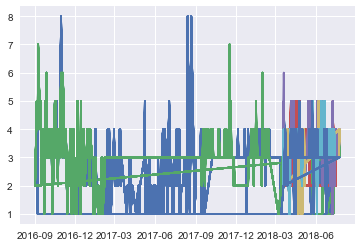

In [394]:
for machine in df.machine_name.value_counts().index.tolist():
    dfff = table3[table3['machine_name'] == machine]
    print (dfff.shape)
    plt.plot(dfff['date_measurement_f'], dfff['number_of_observations'])

In [395]:
table3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17212 entries, 0 to 17211
Data columns (total 12 columns):
machine_name              17212 non-null object
sensor_type               17212 non-null object
date_measurement_f        17212 non-null datetime64[ns]
number_of_observations    17212 non-null int64
1                         17212 non-null float64
2                         16072 non-null float64
3                         14246 non-null float64
4                         3180 non-null float64
5                         719 non-null float64
6                         148 non-null float64
7                         60 non-null float64
8                         36 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 1.6+ MB


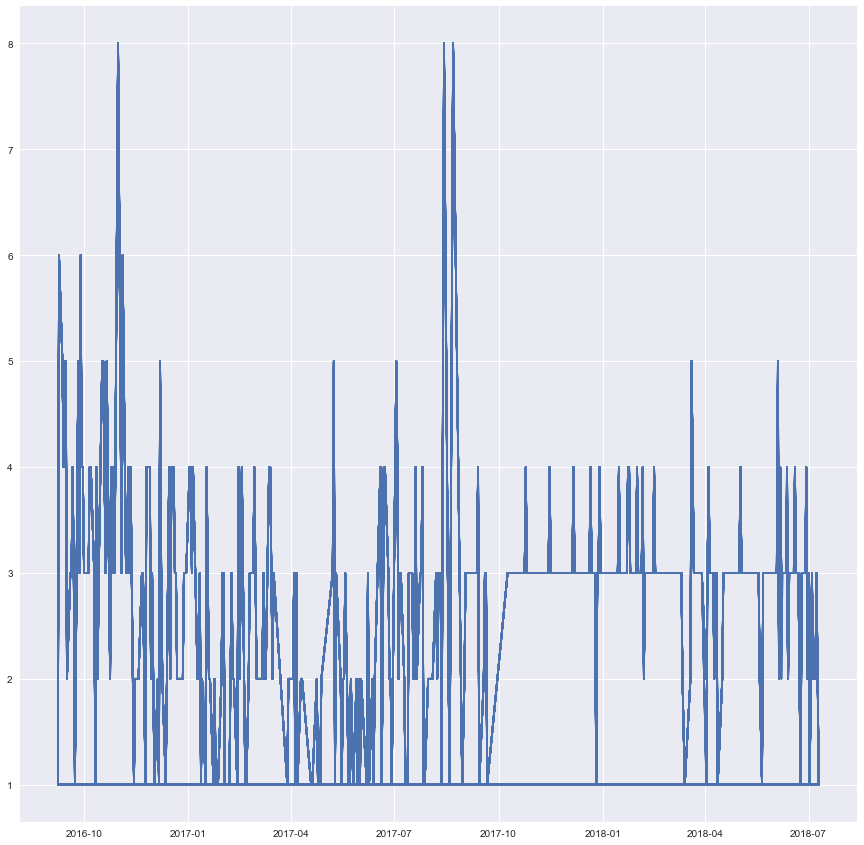

In [396]:
plt.figure(figsize=(15,15))
dfff = table3[table3['machine_name'] == 'RBG7']
plt.plot(dfff['date_measurement_f'], dfff['number_of_observations'])

In [397]:
def plot_distribution(machine):
    dfff = table3[table3['machine_name'] == machine]
    f1 = sns.distplot(dfff.number_of_observations, label=machine)

# Plot distribution of machines
['RBG7', 'RBG1', 'RBG2', 'RBG3', 'RBG4', 'RBG6', 'RBG5']

C:\Program Files\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


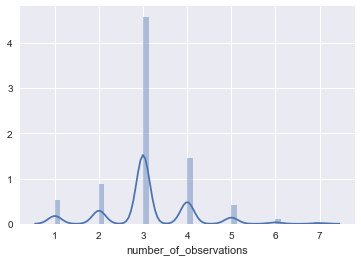

In [398]:
plot_distribution('RBG1')

C:\Program Files\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


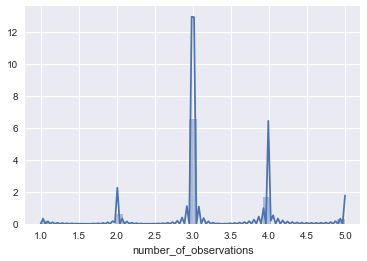

In [399]:
plot_distribution('RBG2')

C:\Program Files\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


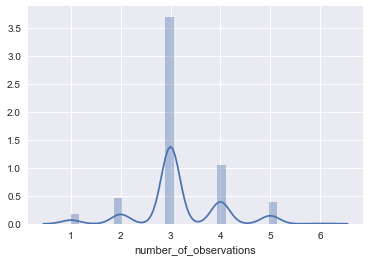

In [400]:
plot_distribution('RBG3')

C:\Program Files\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


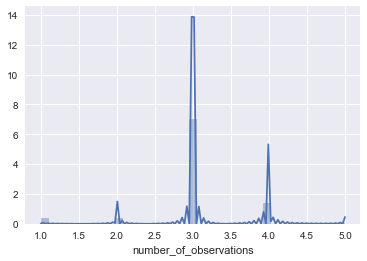

In [401]:
plot_distribution('RBG4')

C:\Program Files\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


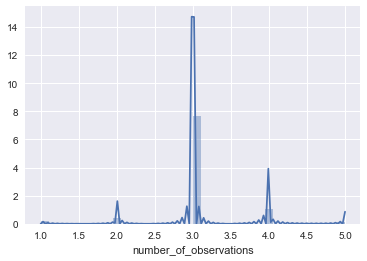

In [402]:
plot_distribution('RBG5')

C:\Program Files\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


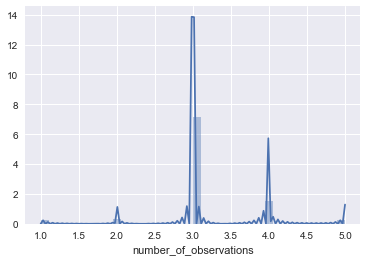

In [403]:
plot_distribution('RBG6')

C:\Program Files\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


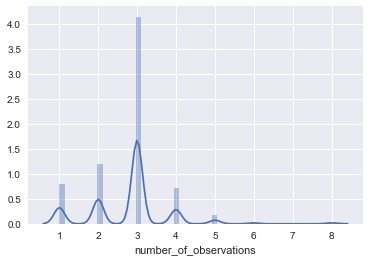

In [404]:
plot_distribution('RBG7')

In [405]:
table3.head()

,machine_name,sensor_type,date_measurement_f,number_of_observations,1,2,3,4,5,6,7,8
0,RBG1,drive_gear_V_eff,2016-09-02,2,1.2463,1.6164,NaN,NaN,NaN,NaN,NaN,NaN
1,RBG1,drive_gear_V_eff,2016-09-06,5,1.7045,1.6939,1.8634,1.9335,1.8229,NaN,NaN,NaN
2,RBG1,drive_gear_V_eff,2016-09-07,5,1.7670,1.7340,1.7306,1.8736,1.8497,NaN,NaN,NaN
3,RBG1,drive_gear_V_eff,2016-09-08,4,1.8276,1.7398,1.9094,2.0121,NaN,NaN,NaN,NaN
4,RBG1,drive_gear_V_eff,2016-09-09,7,2.0060,1.9085,1.8524,1.8190,1.8282,1.8688,1.8224,NaN


In [406]:
table3.groupby(['machine_name', 'sensor_type']).agg({'number_of_observations' : ['mean', 'count']})

number_of_observations      
                                                   mean count
machine_name sensor_type                                     
RBG1         drive_gear_V_eff                  3.100000   330
             drive_gear_a_max                  3.100000   330
             drive_motor_V_eff                 3.100000   330
             drive_motor_a_max                 3.100000   330
             drive_wheel_V_eff                 3.100000   330
             drive_wheel_a_max                 3.100000   330
             idle_wheel_V_eff                  3.100000   330
             idle_wheel_a_max                  3.100000   330
             lifting_gear_V_eff                3.115152   330
             lifting_gear_a_max                3.115152   330
             lifting_motor_V_eff               3.115152   330
             lifting_motor_a_max               3.115152   330
RBG2         drive_gear_V_eff                  3.150000   120
             drive_gear_a_max                  3.150000   120
             drive_motor_V_eff                 3.150000   120
             drive_motor_a_max                 3.150000   120
             drive_wheel_V_eff                 3.150000   120
             drive_wheel_a_max                 3.150000   120
             idle_wheel_V_eff                  3.150000   120
             idle_wheel_a_max                  3.150000   120
             lifting_gear_V_eff                3.150000   120
             lifting_gear_a_max                3.150000   120
             lifting_motor_V_eff               3.150000   120
             lifting_motor_a_max               3.150000   120
RBG3         drive_gear_V_eff                  3.168067   119
             drive_gear_a_max                  3.168067   119
             drive_motor_V_eff                 3.168067   119
             drive_motor_a_max                 3.168067   119
             drive_wheel_V_eff                 3.168067   119
             drive_wheel_a_max                 3.168067   119
...                                                 ...   ...
RBG5         idle_wheel_V_eff                  3.048387   124
             idle_wheel_a_max                  3.048387   124
             lifting_gear_V_eff                3.048387   124
             lifting_gear_a_max                3.048387   124
             lifting_motor_V_eff               3.048387   124
             lifting_motor_a_max               3.048387   124
RBG6         drive_gear_V_eff                  3.129032   124
             drive_gear_a_max                  3.129032   124
             drive_motor_V_eff                 3.129032   124
             drive_motor_a_max                 3.129032   124
             drive_wheel_V_eff                 3.129032   124
             drive_wheel_a_max                 3.129032   124
             idle_wheel_V_eff                  3.129032   124
             idle_wheel_a_max                  3.129032   124
             lifting_gear_V_eff                3.112000   125
             lifting_gear_a_max                3.112000   125
             lifting_motor_V_eff               3.112000   125
             lifting_motor_a_max               3.112000   125
RBG7         drive_gear_V_eff                  2.803607   499
             drive_gear_a_max                  2.805611   499
             drive_motor_V_eff                 2.805611   499
             drive_motor_a_max                 2.805611   499
             drive_wheel_V_eff                 2.805611   499
             drive_wheel_a_max                 2.805611   499
             idle_wheel_V_eff                  2.803607   499
             idle_wheel_a_max                  2.805611   499
             lifting_gear_V_eff                2.803607   499
             lifting_gear_a_max                2.803607   499
             lifting_motor_V_eff               2.801603   499
             lifting_motor_a_max               2.803607   499

[84 rows x 2 columns]

In [407]:
dfff['date_measurement_f'].apply(lambda x: x.month).unique()

array([ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [408]:
table3.machine_name.value_counts() / 12

RBG7    499.000000
RBG1    330.000000
RBG6    124.333333
RBG5    124.000000
RBG2    120.000000
RBG3    119.000000
RBG4    118.000000
Name: machine_name, dtype: float64

In [409]:
machine6 = table3[table3['machine_name'] == 'RBG6']

In [410]:
idx = pd.period_range(min(table3.date_measurement_f), max(table3.date_measurement_f))
#results.reindex(idx, fill_value=0)

In [411]:
idx

PeriodIndex(['2016-09-02', '2016-09-03', '2016-09-04', '2016-09-05',
             '2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09',
             '2016-09-10', '2016-09-11',
             ...
             '2018-07-15', '2018-07-16', '2018-07-17', '2018-07-18',
             '2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22',
             '2018-07-23', '2018-07-24'],
            dtype='period[D]', length=691, freq='D')

In [412]:
machine6.sort_values('date_measurement_f')['date_measurement_f'].unique()

array(['2018-03-19T00:00:00.000000000', '2018-03-20T00:00:00.000000000',
       '2018-03-21T00:00:00.000000000', '2018-03-22T00:00:00.000000000',
       '2018-03-23T00:00:00.000000000', '2018-03-24T00:00:00.000000000',
       '2018-03-25T00:00:00.000000000', '2018-03-26T00:00:00.000000000',
       '2018-03-27T00:00:00.000000000', '2018-03-28T00:00:00.000000000',
       '2018-03-29T00:00:00.000000000', '2018-04-02T00:00:00.000000000',
       '2018-04-03T00:00:00.000000000', '2018-04-04T00:00:00.000000000',
       '2018-04-05T00:00:00.000000000', '2018-04-06T00:00:00.000000000',
       '2018-04-07T00:00:00.000000000', '2018-04-08T00:00:00.000000000',
       '2018-04-09T00:00:00.000000000', '2018-04-10T00:00:00.000000000',
       '2018-04-11T00:00:00.000000000', '2018-04-12T00:00:00.000000000',
       '2018-04-13T00:00:00.000000000', '2018-04-14T00:00:00.000000000',
       '2018-04-15T00:00:00.000000000', '2018-04-16T00:00:00.000000000',
       '2018-04-17T00:00:00.000000000', '2018-04-18

In [413]:
table3.head(10)

,machine_name,sensor_type,date_measurement_f,number_of_observations,1,2,3,4,5,6,7,8
0,RBG1,drive_gear_V_eff,2016-09-02,2,1.2463,1.6164,NaN,NaN,NaN,NaN,NaN,NaN
1,RBG1,drive_gear_V_eff,2016-09-06,5,1.7045,1.6939,1.8634,1.9335,1.8229,NaN,NaN,NaN
2,RBG1,drive_gear_V_eff,2016-09-07,5,1.7670,1.7340,1.7306,1.8736,1.8497,NaN,NaN,NaN
3,RBG1,drive_gear_V_eff,2016-09-08,4,1.8276,1.7398,1.9094,2.0121,NaN,NaN,NaN,NaN
4,RBG1,drive_gear_V_eff,2016-09-09,7,2.0060,1.9085,1.8524,1.8190,1.8282,1.8688,1.8224,NaN
5,RBG1,drive_gear_V_eff,2016-09-12,5,1.7476,1.8234,1.8106,1.7187,1.7042,NaN,NaN,NaN
6,RBG1,drive_gear_V_eff,2016-09-13,4,1.7660,2.0192,1.9510,1.8576,NaN,NaN,NaN,NaN
7,RBG1,drive_gear_V_eff,2016-09-14,4,1.8600,1.8873,1.9024,1.7723,NaN,NaN,NaN,NaN
8,RBG1,drive_gear_V_eff,2016-09-15,5,1.7655,1.6897,1.7683,1.8433,1.8098,NaN,NaN,NaN
9,RBG1,drive_gear_V_eff,2016-09-16,2,1.7089,1.8832,NaN,NaN,NaN,NaN,NaN,NaN


In [414]:
table3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17212 entries, 0 to 17211
Data columns (total 12 columns):
machine_name              17212 non-null object
sensor_type               17212 non-null object
date_measurement_f        17212 non-null datetime64[ns]
number_of_observations    17212 non-null int64
1                         17212 non-null float64
2                         16072 non-null float64
3                         14246 non-null float64
4                         3180 non-null float64
5                         719 non-null float64
6                         148 non-null float64
7                         60 non-null float64
8                         36 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 1.6+ MB


In [415]:
table3['day_of_observation'] = table3['date_measurement_f'].apply(lambda x: x.day)

In [416]:
table3.head()

,machine_name,sensor_type,date_measurement_f,number_of_observations,1,2,3,4,5,6,7,8,day_of_observation
0,RBG1,drive_gear_V_eff,2016-09-02,2,1.2463,1.6164,NaN,NaN,NaN,NaN,NaN,NaN,2
1,RBG1,drive_gear_V_eff,2016-09-06,5,1.7045,1.6939,1.8634,1.9335,1.8229,NaN,NaN,NaN,6
2,RBG1,drive_gear_V_eff,2016-09-07,5,1.7670,1.7340,1.7306,1.8736,1.8497,NaN,NaN,NaN,7
3,RBG1,drive_gear_V_eff,2016-09-08,4,1.8276,1.7398,1.9094,2.0121,NaN,NaN,NaN,NaN,8
4,RBG1,drive_gear_V_eff,2016-09-09,7,2.0060,1.9085,1.8524,1.8190,1.8282,1.8688,1.8224,NaN,9


In [417]:
table3.columns

Index(['machine_name', 'sensor_type', 'date_measurement_f',
       'number_of_observations', '1', '2', '3', '4', '5', '6', '7', '8',
       'day_of_observation'],
      dtype='object')

In [418]:
table3['max_measurement_of_day'] = table3[[ '1', '2', '3', '4', '5', '6', '7', '8']].max(axis=1)

In [419]:
table3.drop([ '1', '2', '3', '4', '5', '6', '7', '8'], axis=1, inplace=True)

In [420]:
table3.head(20)

,machine_name,sensor_type,date_measurement_f,number_of_observations,day_of_observation,max_measurement_of_day
0,RBG1,drive_gear_V_eff,2016-09-02,2,2,1.6164
1,RBG1,drive_gear_V_eff,2016-09-06,5,6,1.9335
2,RBG1,drive_gear_V_eff,2016-09-07,5,7,1.8736
3,RBG1,drive_gear_V_eff,2016-09-08,4,8,2.0121
4,RBG1,drive_gear_V_eff,2016-09-09,7,9,2.0060
5,RBG1,drive_gear_V_eff,2016-09-12,5,12,1.8234
6,RBG1,drive_gear_V_eff,2016-09-13,4,13,2.0192
7,RBG1,drive_gear_V_eff,2016-09-14,4,14,1.9024
8,RBG1,drive_gear_V_eff,2016-09-15,5,15,1.8433
9,RBG1,drive_gear_V_eff,2016-09-16,2,16,1.8832


# Targer dataframe is with 1434 rows

In [421]:
table3.shape

(17212, 6)

In [422]:
table3['date_measurement_f'] = table3.date_measurement_f.astype(str)

In [423]:
table3['new_index'] = table3[['machine_name', 'date_measurement_f']].apply(lambda x: ')'.join(x), axis=1)

In [424]:
table4 = table3.pivot(index='new_index', columns='sensor_type', values='max_measurement_of_day')

In [425]:
table4.columns

Index(['drive_gear_V_eff', 'drive_gear_a_max', 'drive_motor_V_eff',
       'drive_motor_a_max', 'drive_wheel_V_eff', 'drive_wheel_a_max',
       'idle_wheel_V_eff', 'idle_wheel_a_max', 'lifting_gear_V_eff',
       'lifting_gear_a_max', 'lifting_motor_V_eff', 'lifting_motor_a_max'],
      dtype='object', name='sensor_type')

In [426]:
table4.reset_index(inplace=True)

In [427]:
table4.columns

Index(['new_index', 'drive_gear_V_eff', 'drive_gear_a_max',
       'drive_motor_V_eff', 'drive_motor_a_max', 'drive_wheel_V_eff',
       'drive_wheel_a_max', 'idle_wheel_V_eff', 'idle_wheel_a_max',
       'lifting_gear_V_eff', 'lifting_gear_a_max', 'lifting_motor_V_eff',
       'lifting_motor_a_max'],
      dtype='object', name='sensor_type')

In [428]:
table5 = table4.new_index.apply(lambda x: pd.Series([i for i in x.split(')')]))

table5.columns = ['machine_name', 'date_measurement_f']

In [429]:
table5[['drive_gear_V_eff', 'drive_gear_a_max',
       'drive_motor_V_eff', 'drive_motor_a_max', 'drive_wheel_V_eff',
       'drive_wheel_a_max', 'idle_wheel_V_eff', 'idle_wheel_a_max',
       'lifting_gear_V_eff', 'lifting_gear_a_max', 'lifting_motor_V_eff',
       'lifting_motor_a_max']] = table4[['drive_gear_V_eff', 'drive_gear_a_max',
       'drive_motor_V_eff', 'drive_motor_a_max', 'drive_wheel_V_eff',
       'drive_wheel_a_max', 'idle_wheel_V_eff', 'idle_wheel_a_max',
       'lifting_gear_V_eff', 'lifting_gear_a_max', 'lifting_motor_V_eff',
       'lifting_motor_a_max']]

In [430]:
table5.head(20)

,machine_name,date_measurement_f,drive_gear_V_eff,drive_gear_a_max,drive_motor_V_eff,drive_motor_a_max,drive_wheel_V_eff,drive_wheel_a_max,idle_wheel_V_eff,idle_wheel_a_max,lifting_gear_V_eff,lifting_gear_a_max,lifting_motor_V_eff,lifting_motor_a_max
0,RBG1,2016-09-02,1.6164,1334.4815,4.0606,1231.5055,2.9060,1317.3656,3.5010,1981.3614,1.3540,952.5795,2.2060,1340.0790
1,RBG1,2016-09-06,1.9335,1384.7760,4.4062,1243.5176,2.9780,1286.1320,3.7398,1970.8240,1.6070,3121.5405,2.4140,1707.4015
2,RBG1,2016-09-07,1.8736,1350.5540,4.4623,1215.5945,3.0620,1379.0340,3.7980,2020.1980,1.6230,2637.6520,2.4430,1694.7920
3,RBG1,2016-09-08,2.0121,1329.8515,4.4166,1216.1105,3.0260,1429.3394,3.6990,2060.6052,1.6630,2731.8062,2.4190,1604.5048
4,RBG1,2016-09-09,2.0060,1596.2396,4.4298,1479.9648,3.0766,1360.0664,3.7855,2125.6670,1.6440,2238.5361,2.4440,1464.9028
5,RBG1,2016-09-12,1.8234,1318.6004,4.4961,1235.7055,3.0400,1521.7410,3.7040,2137.2740,1.6100,2593.9425,2.4330,1435.4252
6,RBG1,2016-09-13,2.0192,1673.6005,4.4976,1276.9955,3.0760,1408.4899,3.7550,2092.6962,1.6343,1926.7993,2.4329,1660.7052
7,RBG1,2016-09-14,1.9024,1494.7375,4.5294,1438.2560,3.0950,1338.8034,3.7480,2100.6632,1.6190,2793.8320,2.4570,1540.3800
8,RBG1,2016-09-15,1.8433,1420.0085,4.4982,1249.2725,3.1200,1518.6265,3.7700,2113.6980,1.6260,2459.2225,2.4200,1810.4520
9,RBG1,2016-09-16,1.8832,1446.1900,4.4598,1229.0005,3.0830,1355.3282,3.7290,2070.2896,1.5750,2923.7250,2.4050,1661.5230


In [431]:
# table5.to_csv('..//data//pretty_pretty_data.csv', index=False)

In [432]:
table5.corr()

,drive_gear_V_eff,drive_gear_a_max,drive_motor_V_eff,drive_motor_a_max,drive_wheel_V_eff,drive_wheel_a_max,idle_wheel_V_eff,idle_wheel_a_max,lifting_gear_V_eff,lifting_gear_a_max,lifting_motor_V_eff,lifting_motor_a_max
drive_gear_V_eff,1.000000,0.087460,0.400271,0.143653,0.265585,0.188027,0.622343,0.582663,0.396368,-0.275206,0.232270,-0.250739
drive_gear_a_max,0.087460,1.000000,0.402193,0.899683,-0.102623,0.040619,0.147795,-0.140832,-0.337278,0.047299,-0.450151,0.405804
drive_motor_V_eff,0.400271,0.402193,1.000000,0.410405,-0.117717,0.120071,0.483652,0.484615,0.009410,0.227978,-0.010249,0.175056
drive_motor_a_max,0.143653,0.899683,0.410405,1.000000,-0.142103,0.008105,0.119180,-0.073904,-0.336400,0.065473,-0.427644,0.393583
drive_wheel_V_eff,0.265585,-0.102623,-0.117717,-0.142103,1.000000,0.833170,0.580946,0.411016,0.753996,-0.670803,0.628785,-0.775891
drive_wheel_a_max,0.188027,0.040619,0.120071,0.008105,0.833170,1.000000,0.466225,0.377337,0.492569,-0.426253,0.401770,-0.559880
idle_wheel_V_eff,0.622343,0.147795,0.483652,0.119180,0.580946,0.466225,1.000000,0.770421,0.613120,-0.431999,0.494449,-0.397775
idle_wheel_a_max,0.582663,-0.140832,0.484615,-0.073904,0.411016,0.377337,0.770421,1.000000,0.603330,-0.148052,0.625310,-0.310044
lifting_gear_V_eff,0.396368,-0.337278,0.009410,-0.336400,0.753996,0.492569,0.613120,0.603330,1.000000,-0.517894,0.899336,-0.646706
lifting_gear_a_max,-0.275206,0.047299,0.227978,0.065473,-0.670803,-0.426253,-0.431999,-0.148052,-0.517894,1.000000,-0.268226,0.766851


In [433]:
def plot_corr(df,size=10, font_size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, fontsize=font_size);
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize=font_size);

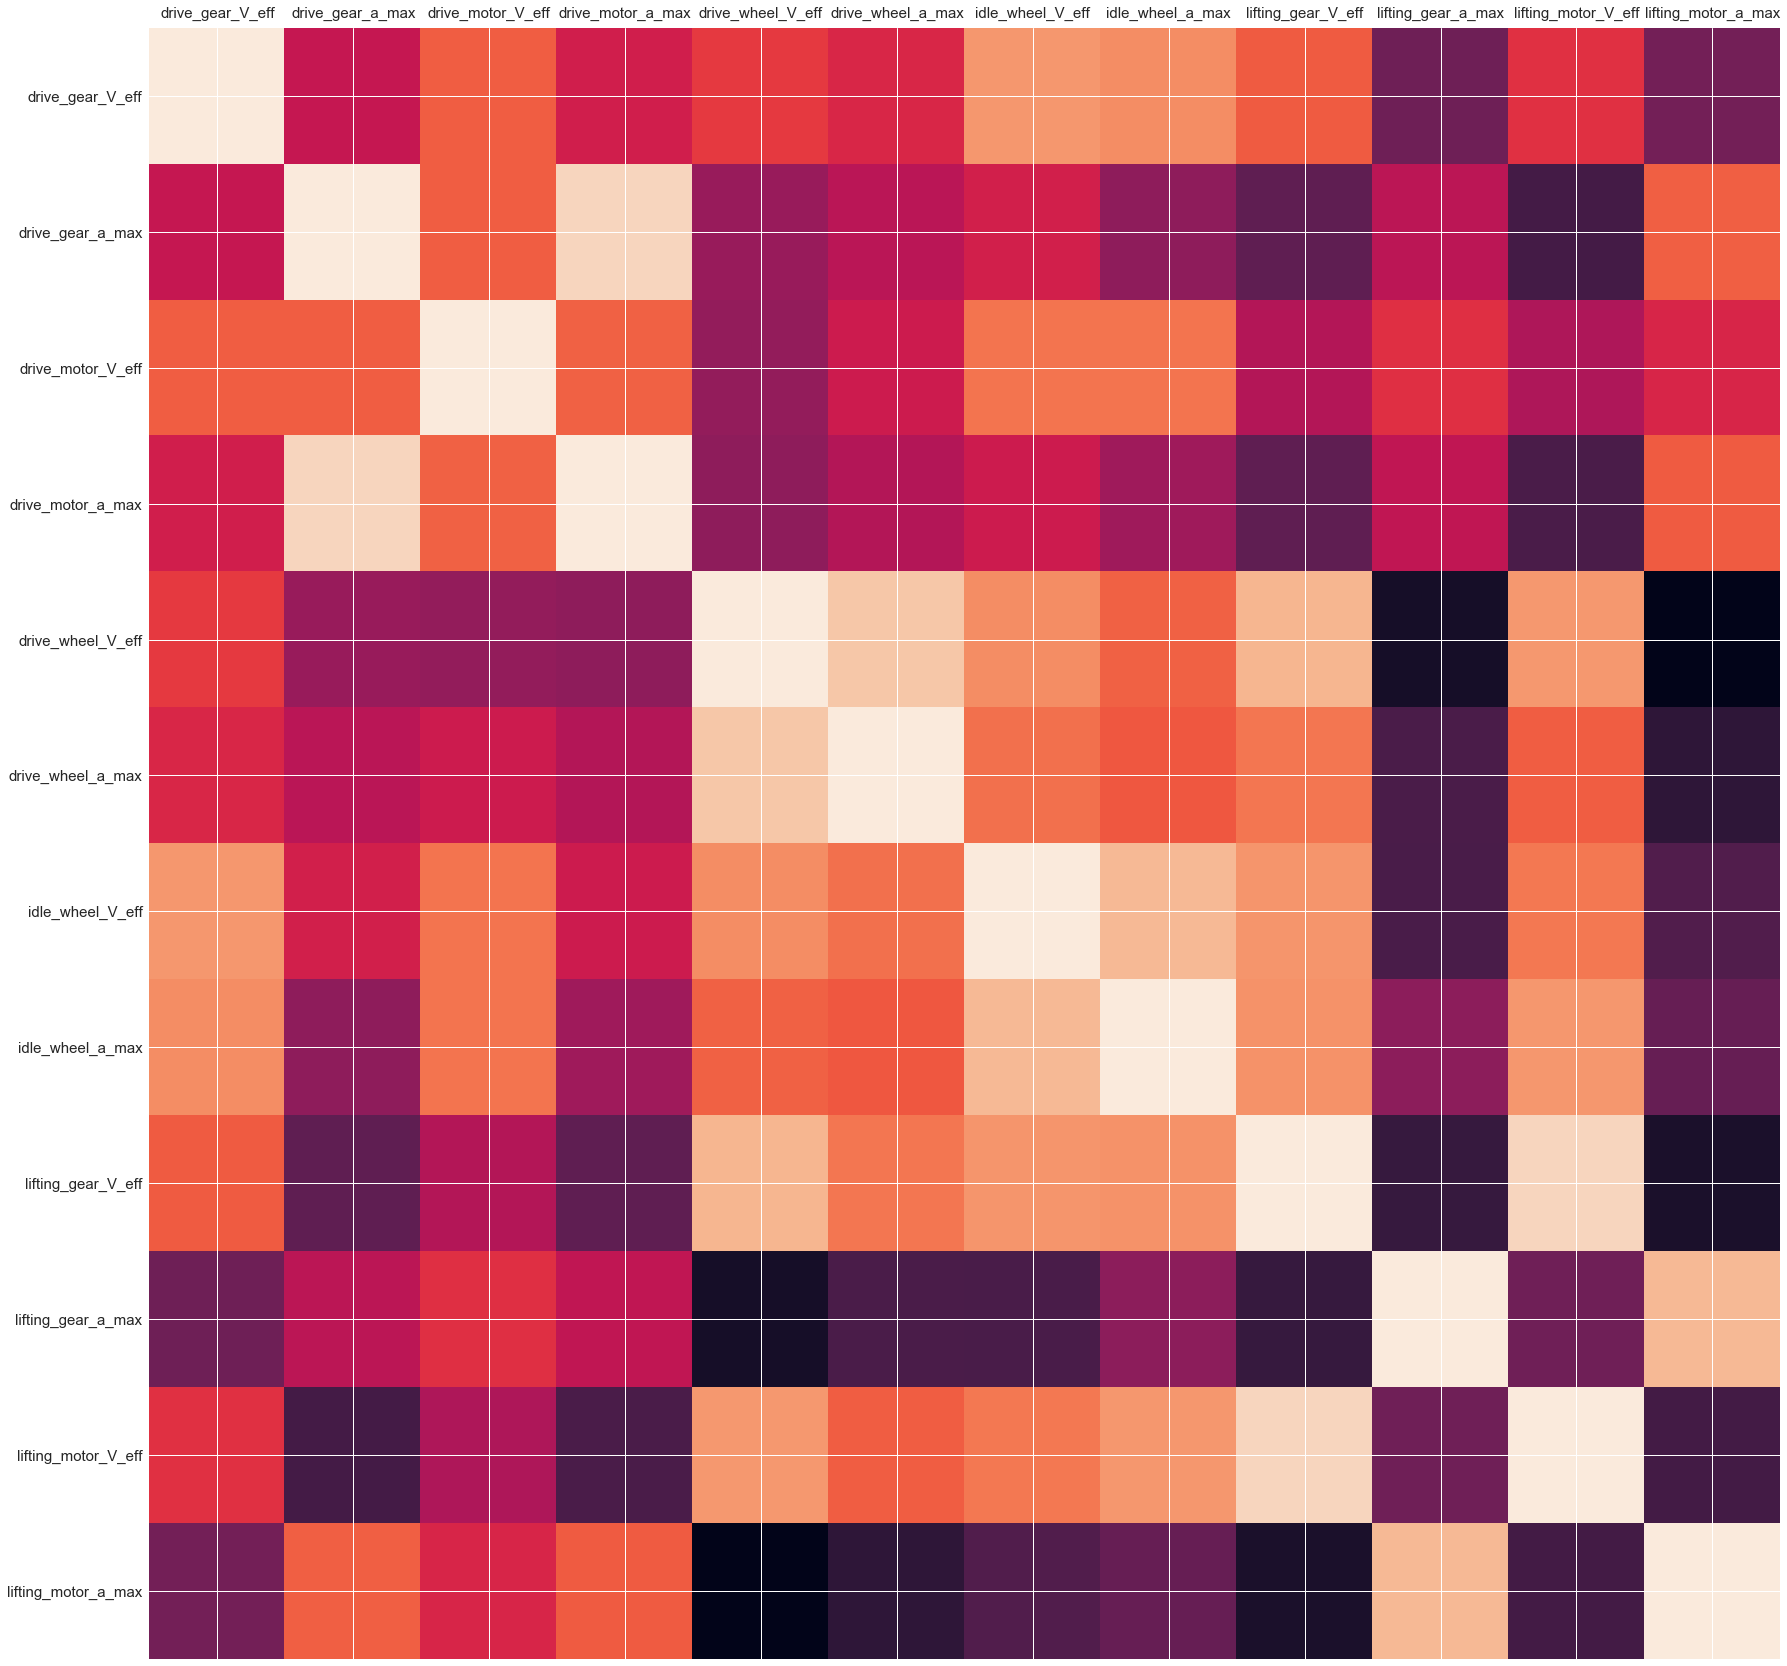

In [434]:
plot_corr(table5, size=30, font_size=15)

In [213]:
! pip freeze | findstr sea

seaborn==0.9.0


You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


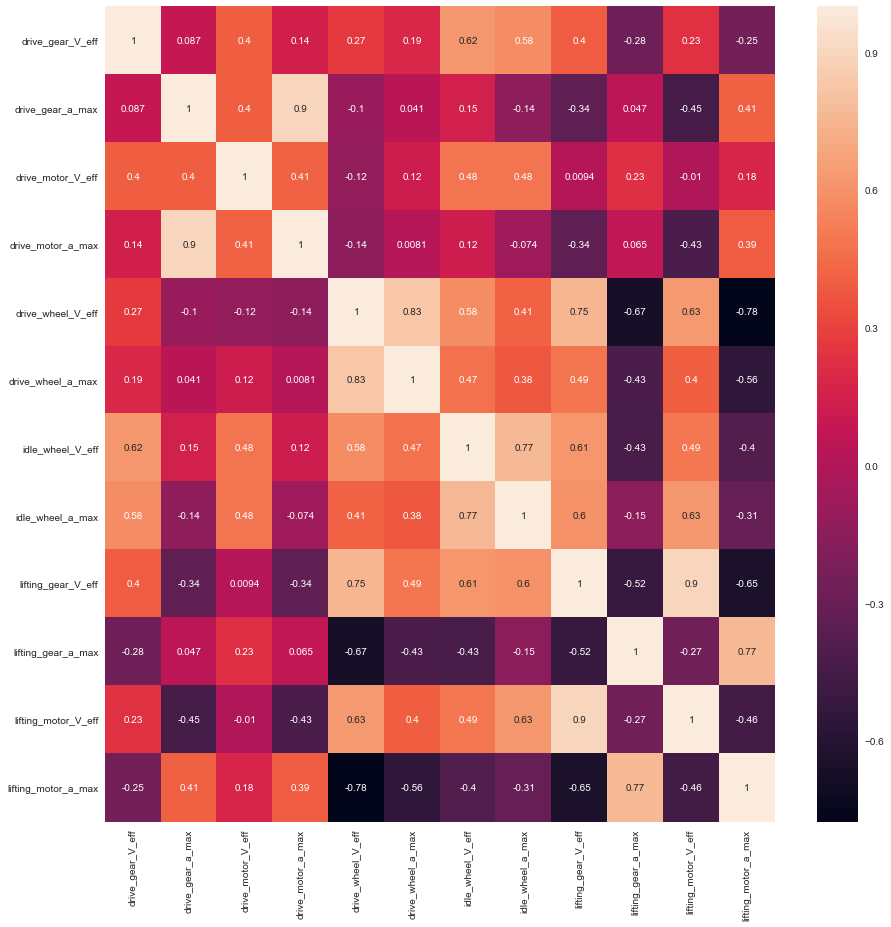

In [435]:
plt.figure(figsize=(15,15))
sns.heatmap(table5.corr(), annot=True)

In [436]:
table5.head()

,machine_name,date_measurement_f,drive_gear_V_eff,drive_gear_a_max,drive_motor_V_eff,drive_motor_a_max,drive_wheel_V_eff,drive_wheel_a_max,idle_wheel_V_eff,idle_wheel_a_max,lifting_gear_V_eff,lifting_gear_a_max,lifting_motor_V_eff,lifting_motor_a_max
0,RBG1,2016-09-02,1.6164,1334.4815,4.0606,1231.5055,2.9060,1317.3656,3.5010,1981.3614,1.354,952.5795,2.206,1340.0790
1,RBG1,2016-09-06,1.9335,1384.7760,4.4062,1243.5176,2.9780,1286.1320,3.7398,1970.8240,1.607,3121.5405,2.414,1707.4015
2,RBG1,2016-09-07,1.8736,1350.5540,4.4623,1215.5945,3.0620,1379.0340,3.7980,2020.1980,1.623,2637.6520,2.443,1694.7920
3,RBG1,2016-09-08,2.0121,1329.8515,4.4166,1216.1105,3.0260,1429.3394,3.6990,2060.6052,1.663,2731.8062,2.419,1604.5048
4,RBG1,2016-09-09,2.0060,1596.2396,4.4298,1479.9648,3.0766,1360.0664,3.7855,2125.6670,1.644,2238.5361,2.444,1464.9028


In [234]:
!pip install sklearn

pyspark 2.3.1 requires py4j==0.10.7, which is not installed.
jupyterlab-launcher 0.11.2 has requirement jsonschema>=2.6.0, but you'll have jsonschema 2.5.1 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [235]:
from sklearn.cluster import KMeans

In [437]:
table5.keys()

Index(['machine_name', 'date_measurement_f', 'drive_gear_V_eff',
       'drive_gear_a_max', 'drive_motor_V_eff', 'drive_motor_a_max',
       'drive_wheel_V_eff', 'drive_wheel_a_max', 'idle_wheel_V_eff',
       'idle_wheel_a_max', 'lifting_gear_V_eff', 'lifting_gear_a_max',
       'lifting_motor_V_eff', 'lifting_motor_a_max'],
      dtype='object')

In [242]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [438]:
table5.dropna(inplace=True)

In [439]:
X_train = table5[table5.machine_name =='RBG7'].iloc[:,2:]

In [326]:
# X_train.isna().sum()

# X_train.dropna(inplace=True)

# X_train.isna().sum()

In [440]:
sc_X = StandardScaler()
X_train_1 = sc_X.fit_transform(X_train)

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_1)
    wcss.append(kmeans.inertia_)

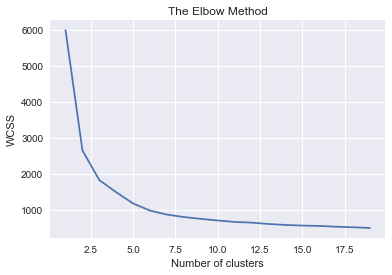

In [441]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [442]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train_1)

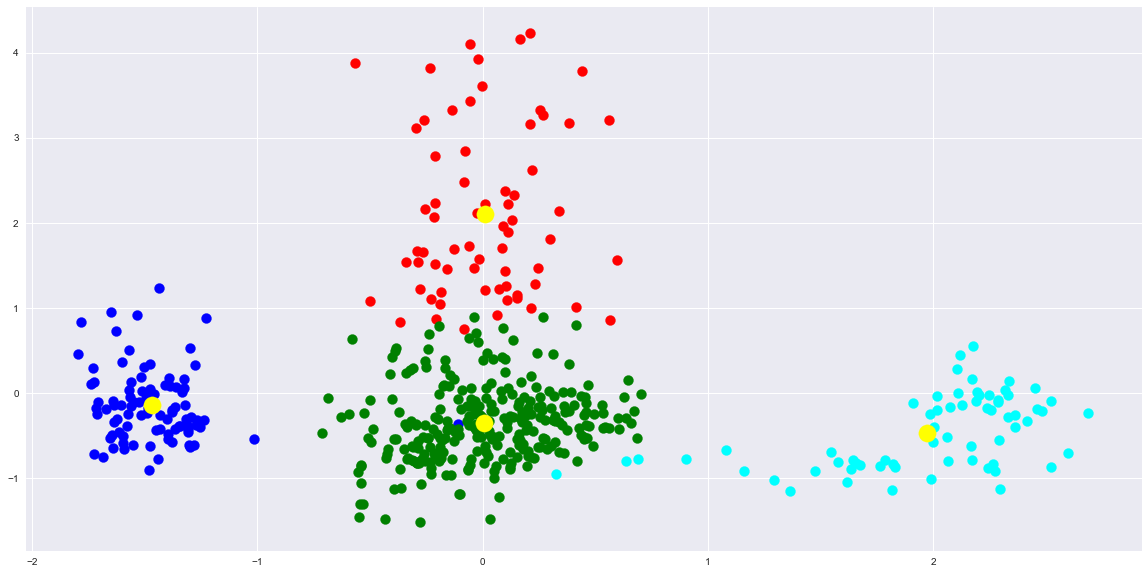

In [443]:
plt.figure(figsize = (20,10))
plt.scatter(X_train_1[y_kmeans == 0, 0], X_train_1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train_1[y_kmeans == 1, 0], X_train_1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train_1[y_kmeans == 2, 0], X_train_1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train_1[y_kmeans == 3, 0], X_train_1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X_train_1[y_kmeans == 4, 0], X_train_1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X_train_1[y_kmeans == 5, 0], X_train_1[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.show()

In [444]:
def find_clusters(data):
    X_train = data.iloc[:,2:]
    sc_X = StandardScaler()
    X_train_1 = sc_X.fit_transform(X_train)

    wcss = []
    for i in range(1, 20):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X_train_1)
        wcss.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X_train_1)
    return y_kmeans.tolist()

# Generate cluster column for every machine

In [445]:
cluster_column = []
for machine in table5.machine_name.unique().tolist():
    cluster_column += find_clusters(table5[table5['machine_name'] == machine])

table5['cluster'] = pd.Series(cluster_column)

In [446]:
table5.head()

,machine_name,date_measurement_f,drive_gear_V_eff,drive_gear_a_max,drive_motor_V_eff,drive_motor_a_max,drive_wheel_V_eff,drive_wheel_a_max,idle_wheel_V_eff,idle_wheel_a_max,lifting_gear_V_eff,lifting_gear_a_max,lifting_motor_V_eff,lifting_motor_a_max,cluster
0,RBG1,2016-09-02,1.6164,1334.4815,4.0606,1231.5055,2.9060,1317.3656,3.5010,1981.3614,1.354,952.5795,2.206,1340.0790,2.0
1,RBG1,2016-09-06,1.9335,1384.7760,4.4062,1243.5176,2.9780,1286.1320,3.7398,1970.8240,1.607,3121.5405,2.414,1707.4015,2.0
2,RBG1,2016-09-07,1.8736,1350.5540,4.4623,1215.5945,3.0620,1379.0340,3.7980,2020.1980,1.623,2637.6520,2.443,1694.7920,2.0
3,RBG1,2016-09-08,2.0121,1329.8515,4.4166,1216.1105,3.0260,1429.3394,3.6990,2060.6052,1.663,2731.8062,2.419,1604.5048,2.0
4,RBG1,2016-09-09,2.0060,1596.2396,4.4298,1479.9648,3.0766,1360.0664,3.7855,2125.6670,1.644,2238.5361,2.444,1464.9028,2.0


In [447]:
table5.to_csv('..//data//final_data.csv', index=False)